# TATA: Online Retail Dataset

## Analisis Kinerja Bisnis dan Perencanaan Strategis:

Toko ritel online telah mempekerjakan Anda sebagai konsultan untuk menganalisis data mereka dan memberikan wawasan kepada CEO dan CMO. Manajemen ingin mengidentifikasi faktor-faktor utama yang berkontribusi pada pendapatan dan merencanakan secara strategis untuk tahun depan. Mereka ingin melihat metrik dari perspektif operasional dan pemasaran serta mencari bimbingan tentang area yang berperforma baik.
Mereka juga ingin melihat metrik berbasis demografi. Pertemuan dengan CEO dan CMO dijadwalkan bulan depan, dan Anda perlu menyediakan analisis dan wawasan untuk mengevaluasi kinerja bisnis saat ini dan menyarankan metrik untuk ekspansi.
Sebagai konsultan yang bertugas menganalisis data toko ritel online, peran Anda sangat penting dalam memahami dan mengoptimalkan generasi pendapatan perusahaan. Anda akan menyelam lebih dalam ke dalam data yang tersedia untuk mengungkap wawasan yang akan membimbing keputusan strategis perusahaan untuk tahun mendatang. Tujuan utamanya adalah untuk mengidentifikasi pendorong utama pertumbuhan pendapatan, baik dari perspektif operasional maupun pemasaran.

### By FRIDHA MEGANTARA PUTRA

In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('Online Retail Data Set.csv', encoding='ISO-8859-1')
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## penghasilan perbulan setiap tahun

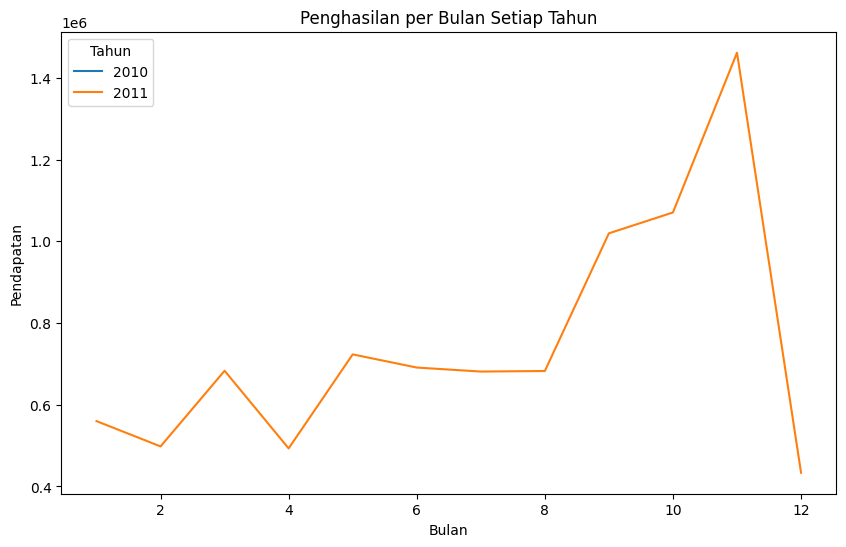

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')

# Menghitung pendapatan untuk setiap transaksi
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

# Ekstrak tahun dan bulan dari InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Mengelompokkan berdasarkan tahun dan bulan, kemudian menghitung total pendapatan
monthly_revenue = df.groupby(['Year', 'Month'])['TotalRevenue'].sum().reset_index()

# Plotting dengan Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

for year in monthly_revenue['Year'].unique():
    data = monthly_revenue[monthly_revenue['Year'] == year]
    ax.plot(data['Month'], data['TotalRevenue'], label=str(year))

ax.set_title('Penghasilan per Bulan Setiap Tahun')
ax.set_xlabel('Bulan')
ax.set_ylabel('Pendapatan')
ax.legend(title='Tahun')
plt.show()

In [11]:
print(monthly_revenue)

    Year  Month  TotalRevenue
0   2010     12    748957.020
1   2011      1    560000.260
2   2011      2    498062.650
3   2011      3    683267.080
4   2011      4    493207.121
5   2011      5    723333.510
6   2011      6    691123.120
7   2011      7    681300.111
8   2011      8    682680.510
9   2011      9   1019687.622
10  2011     10   1070704.670
11  2011     11   1461756.250
12  2011     12    433668.010


## negara dengan penghasilan terbanyak selama satu tahun

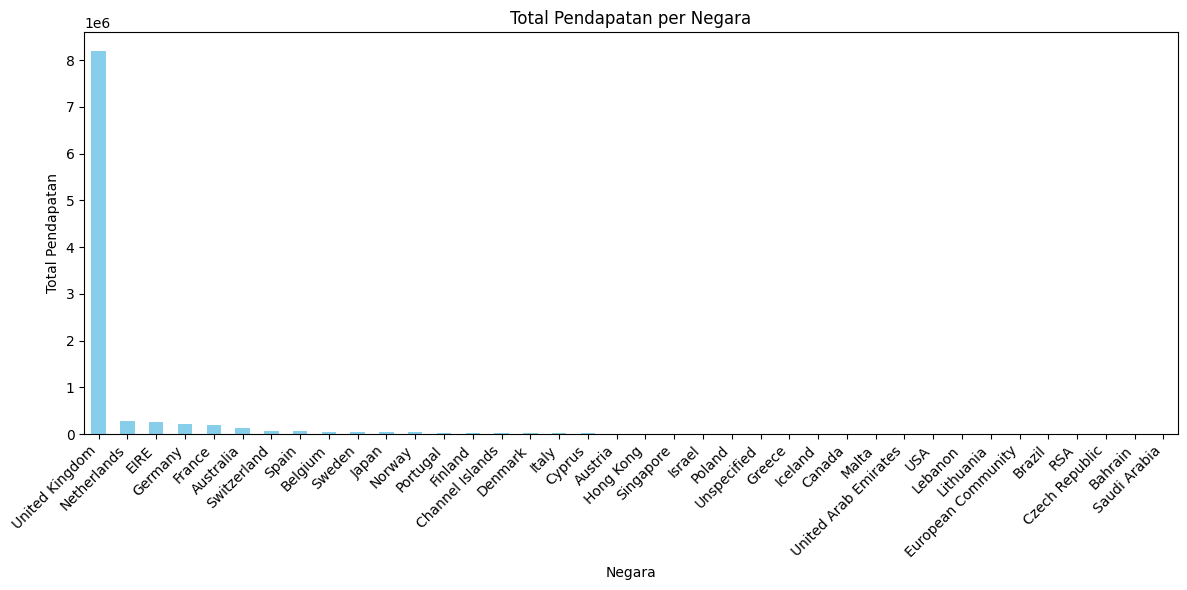

In [27]:
import matplotlib.pyplot as plt

df['Revenue'] = df['Quantity'] * df['UnitPrice']
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
revenue_by_country.plot(kind='bar', ax=ax, color='skyblue')

# Menambahkan label dan judul
ax.set_xlabel('Negara')
ax.set_ylabel('Total Pendapatan')
ax.set_title('Total Pendapatan per Negara')

plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x untuk memperbaiki tampilan
plt.tight_layout()  # Menyusun layout agar lebih rapi
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_11780\1208171051.py:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



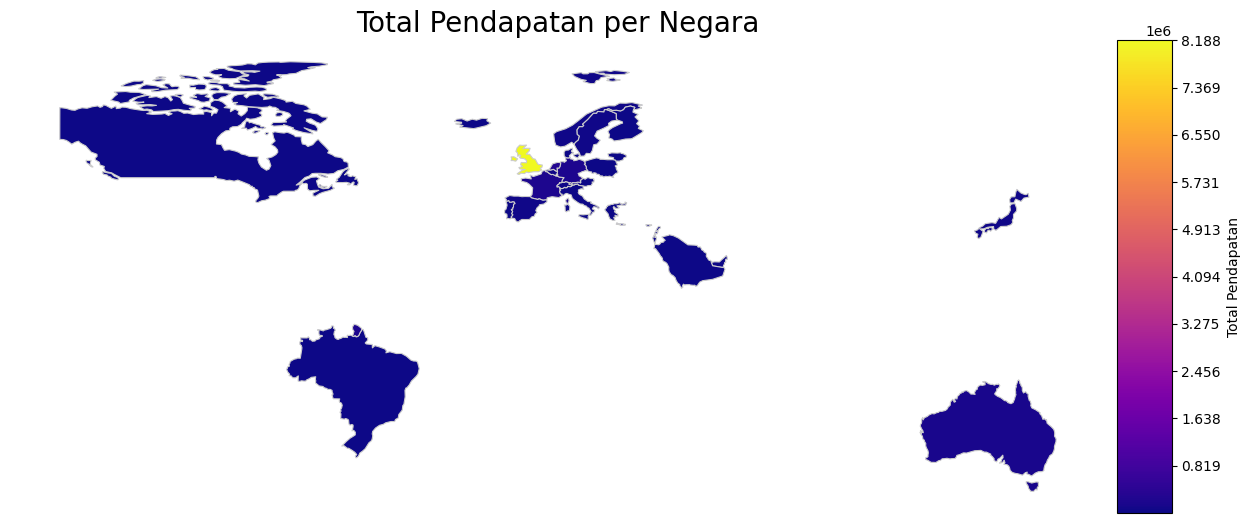

In [28]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data negara
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Gabungkan data pendapatan dengan data negara
world = world.merge(revenue_by_country, how='left', left_on='name', right_on='Country')

# Plotting peta
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='Revenue', cmap='plasma', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax,
           legend_kwds={'label': "Total Pendapatan", 'orientation': "vertical", 'ticks': range(0, int(world['Revenue'].max()), int(world['Revenue'].max()/10))})
ax.set_title('Total Pendapatan per Negara', fontsize=20)
ax.set_axis_off()
plt.show()


## jenis barang yang paling banyak terjual di setiap negara 


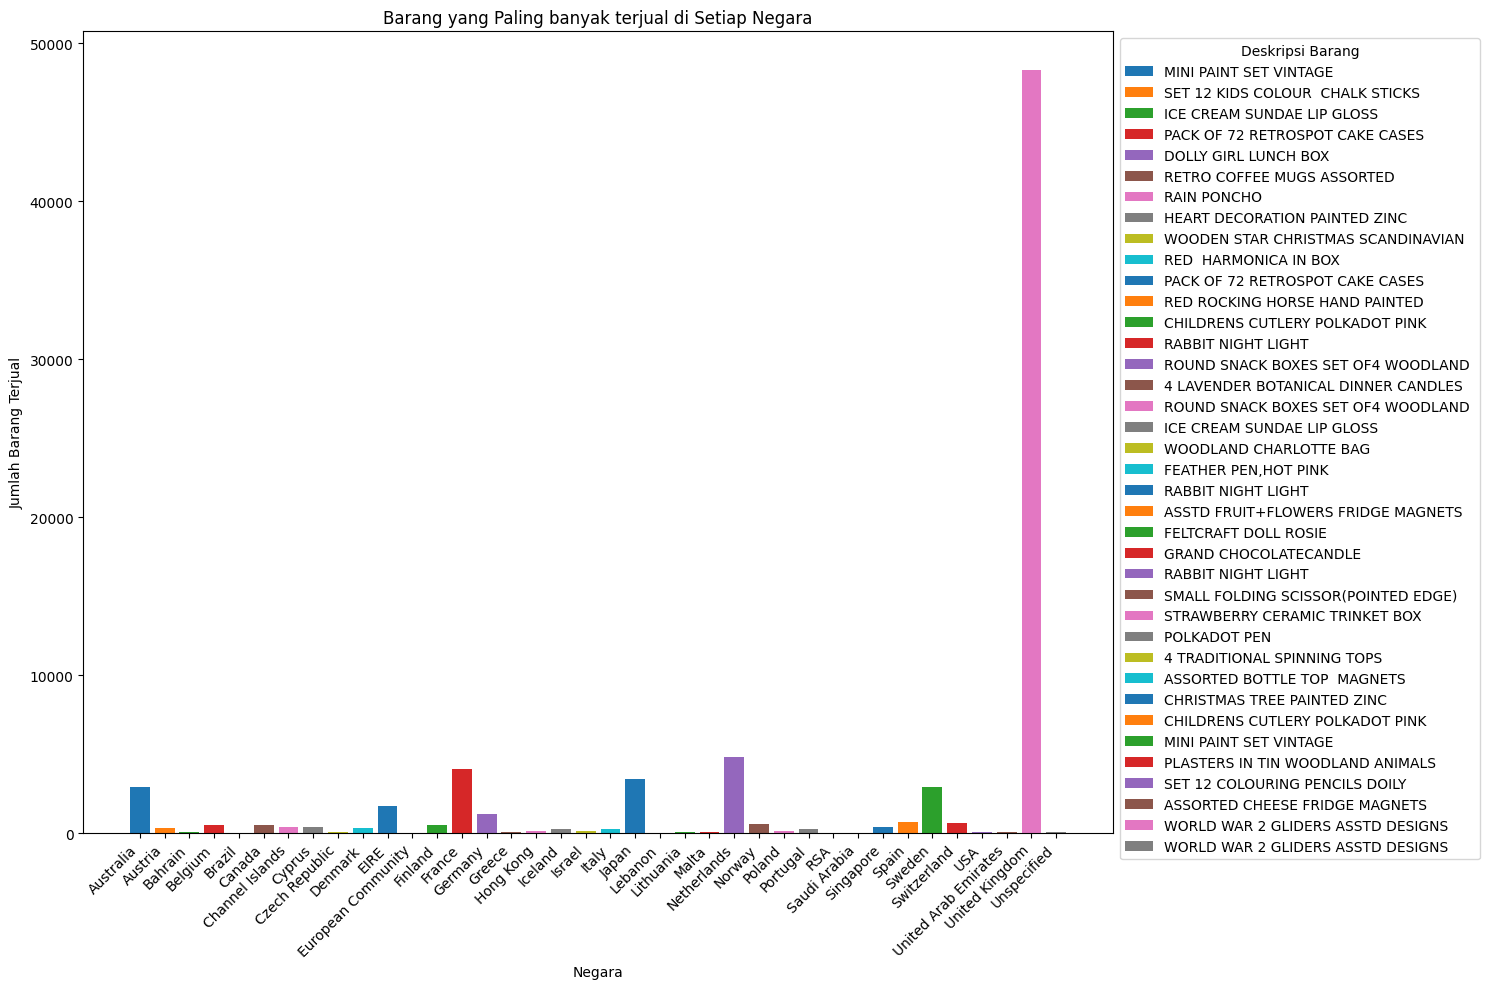

In [29]:
# Menghitung pendapatan untuk setiap transaksi
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Mengelompokkan berdasarkan negara dan deskripsi barang, kemudian menghitung total penjualan
popular_items_by_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# Mengambil deskripsi barang yang paling laku di setiap negara dengan jumlah terbanyak
popular_items_by_country = popular_items_by_country.loc[popular_items_by_country.groupby('Country')['Quantity'].idxmax()]

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

for country, data in popular_items_by_country.groupby('Country'):
    ax.bar(country, data['Quantity'], label=data['Description'].values[0])

# Menambahkan label dan judul
ax.set_xlabel('Negara')
ax.set_ylabel('Jumlah Barang Terjual')
ax.set_title('Barang yang Paling banyak terjual di Setiap Negara')
ax.legend(title='Deskripsi Barang', bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x untuk memperbaiki tampilan
plt.tight_layout()  # Menyusun layout agar lebih rapi
plt.show()